# CMSE 201 Final Project - Data

### &#9989; Minh Anh Dang
### &#9989; Section_005

# ___Vietnamese National Highschool Graduation Exam___

## Background and Motivation

The yearly Vietnamese National Highschool Graduation Exam (NHGE) can be considered the most important exam one could take in their lifetime, as the results directly contribute to your chances of getting into higher education. This exam also has another purpose: to evaluate whether you are qualified to graduate high school.

From 2017, every student taking the NHGE must take on a minimum of 4 (mostly multiple choices) exams that cover 6 subjects. Those 4 exams are Mathematics, Literature, Foreign Language, and a Specific Elective that consists of 3 subjects. To graduate, none of your subject score must be below 1/10. On the other hand, to get into your institutions and majors of choice, technically you don't need to care for all subjects. For example, if you want to get into medical school, you only need to care about the cumulative score of 3 subjects: Mathematics, Chemistry, and Biology.

In this project, I want to explore the following question: What is objectively the hardest and easiest subject in the NHGE from 2017 - 2021?

## Methodology

To answer my research question, I first had to consider the 7 foreign subjects that the NHGE offers students. I know that most students choose English, but is it enough to consider Foreign Language a singular subject? To answer this, I will create a pie chart to visualize the percentage of foreign languages taken in the NHGE.

After that, I will create a heatmap to see the correlation between every subject grade from 2017 - 2019, the less compatible a subject is to other subjects, the harder that subject is to study for. And lastly, I will consider the number of fail and excel scores for each subject, as well as the mean and median score of each subject.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# In the big dataset (NHGE 2017 - 2021), there is no column indicating language code (N1 - English, N2 - Russian, etc.)
# As such, to calculate the percentage of foreign languages taken in the NHGE, I have to load in datasets that 
# have such a column. The datasets I found are from 2019 and 2020.

NHGE_2020 = pd.read_csv("NHGE_2020.csv", usecols = range(1, 12, 1)) # read in NHGE data from 2020 [1]
# rename the columns (they were in Vietnamese)
NHGE_2020.columns = ["Geography", "Civic Education", "Chemistry", "Physics", "Language Code",
                     "Foreign Language", "Biology", "History", "Mathematics", "Literature", "Student ID"] 

NHGE_2019 = pd.read_csv("NHGE_2019.csv", usecols = range(1, 12, 1)) # read in NHGE data from 2019 [2]
# rename the columns (they were in Vietnamese)
NHGE_2019.columns = ["Student ID", "Literature", "Mathematics", "Language Code", "Foreign Language",
                     "Physics", "Chemistry", "Biology", "History", "Geography", "Civic Education"]

In [3]:
# In the big dataset (NHGE 2017 - 2021), there seems to be a lot of data missing for 2017, as such, I have to drop 
# all rows from 2017 in the big dataset and then load in another smaller one that only has data for 2017 
# and concat them together.

df = pd.read_csv("NHGE_2017-2021.csv") # read in NHGE data from 2017 - 2021 [3]
# rename the columns
df.columns = ["Student ID", "Mathematics", "Literature", "Physics", "Biology", "Foreign Language",
              "Year", "Chemistry", "History", "Geography", "Civic Education", "Province Code"]
data_2017 = df[df["Year"] == 2017].index 
NHGE_1821 = df.drop(data_2017) # dropping all data from 2017 in the dataset 
NHGE_1821 = NHGE_1821[["Student ID", "Year", "Province Code",
                       "Mathematics", "Literature", "Foreign Language", 
                       "Physics", "Chemistry", "Biology",
                       "History", "Geography", "Civic Education"]] # reorder the columns

# making a dataset of only scores
NHGE_1821_subjects = NHGE_1821.drop(labels = ["Student ID", "Year", "Province Code"], axis = 1) 
NHGE_1821["Total Score"] = NHGE_1821_subjects.sum(axis = 1)

In [4]:
NHGE_2017 = pd.read_csv("NHGE_2017.csv") # read in NHGE data from 2017 (more accurate) [4]

# reformat the dataset so that it matches the 2018 - 2021 dataset
NHGE_2017.drop(labels = ["province", "combined_natural_sciences", "combined_social_sciences"], 
               axis = 1, inplace = True)
NHGE_2017.columns = ["Student ID", "Mathematics", "Literature", "Physics", "Chemistry", 
                     "Biology", "History", "Geography", "Civic Education", "Foreign Language"]
NHGE_2017["Year"] = 2017
NHGE_2017["Province Code"] = NHGE_2017["Student ID"].astype(str).str[:-6].astype(int) # dropping the last 6 numbers of 
                                                                                      # all student IDs, the remaining
                                                                                      # is the province code [5]

NHGE_2017 = NHGE_2017[["Student ID", "Year", "Province Code",
                       "Mathematics", "Literature", "Foreign Language", 
                       "Physics", "Chemistry", "Biology",
                       "History", "Geography", "Civic Education"]] # reorder the columns
NHGE_2017_subjects = NHGE_2017.drop(labels = ["Student ID", "Province Code", "Year"], axis = 1)
NHGE_2017["Total Score"] = NHGE_2017_subjects.sum(axis = 1)


In [5]:
# combining the 2017 dataset and the 2018 - 2021 to make a complete dataset
NHGE_1721 = pd.concat([NHGE_2017, NHGE_1821])
NHGE_1721_subjects = pd.concat([NHGE_2017_subjects, NHGE_1821_subjects])

In [6]:
# test if the length of the new dataset matches the length of the old dataset
len(NHGE_1721) == len(df)

True

## Results

In [7]:
# Making lists of the percentage of foreign languages taken in the NHGE, which include English (N1), all 6 other 
# languages, and unknown (missing) values. These missing can be students who missed the exam, or those who were able to
# skip the language exam, since one can if they have some sort of equivalent certificate (IELTS, TOEFL, JLPT, etc.)

fl_code = pd.unique(NHGE_2019["Language Code"]) # setting up a list of unique values in the "Language Code" column
fl_prop1 = []
fl_prop2 = []
for i in range(len(fl_code)):
    
    # calculating the percentage of each code in the whole column
    fl_prop1.append(len(NHGE_2020[NHGE_2020["Language Code"] == fl_code[i]]) / len(NHGE_2020) * 100) 
    fl_prop2.append(len(NHGE_2019[NHGE_2019["Language Code"] == fl_code[i]]) / len(NHGE_2019) * 100)
    
unknown1 = 100 - sum(fl_prop1)              # there are NAs in the column
other1 = sum(fl_prop1[1:len(fl_prop1)])     # all other codes (except N1) are summed up
fl_perc1 = [fl_prop1[0], other1, unknown1]  # making a list of N1, all other codes, and unknown

unknown2 = 100 - sum(fl_prop2)              # there are NAs in the column
other2 = sum(fl_prop2[1:len(fl_prop2)])     # all other codes (except N1) are summed up
fl_perc2 = [fl_prop2[0], other2, unknown2]  # making a list of N1, all other codes, and unknown

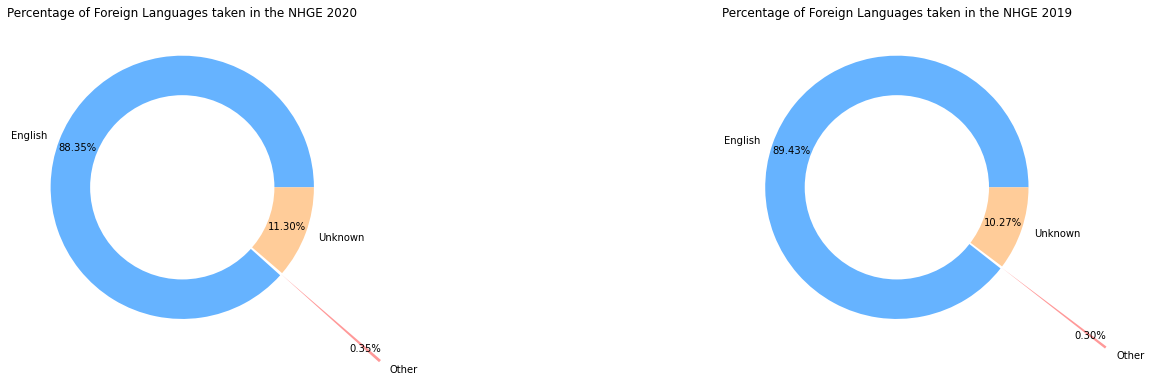

In [8]:
# Most of the code below are inspirations taken from medium.com [6]

plt.figure(figsize = (20, 20))

plt.subplot(4, 2, 1)
# making a pie chart for the percentage of foreign language taken in the NHGE 20202
plt.pie(fl_perc1, labels = ["English", "Other", "Unknown"], textprops = {'fontsize': 10}, explode = (0, 1, 0),
        autopct = '%.2f%%', colors = ["#66b3ff", "#ff9999", "#ffcc99"], pctdistance = 0.85);
plt.title("Percentage of Foreign Languages taken in the NHGE 2020")

# making a white circle at the center of the pie chart 
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(4, 2, 2)
# making a pie chart for the percentage of foreign language taken in the NHGE 2019
plt.pie(fl_perc2, labels = ["English", "Other", "Unknown"], textprops = {'fontsize': 10}, explode = (0, 1, 0),
        autopct = '%.2f%%', colors = ["#66b3ff", "#ff9999", "#ffcc99"], pctdistance = 0.85);
plt.title("Percentage of Foreign Languages taken in the NHGE 2019")

# making a white circle at the center of the pie chart
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

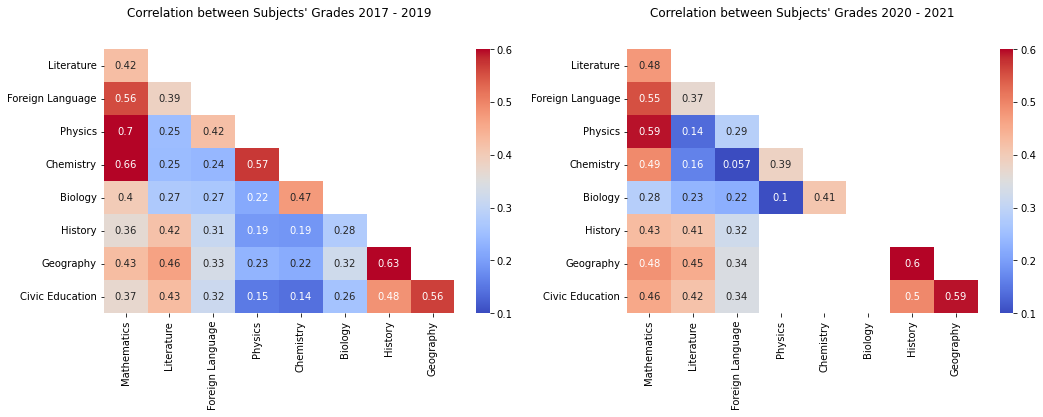

In [9]:
# Most of the code below are inspirations taken from towardsdatascience.com [7]

plt.figure(figsize = (15, 20))

# splitting up the dataset by years, because from 2017 - 2019, a student can take 9 subjects in the NHGE
# while for 2020 and 2021, the maximum number of subjects any student can take is 6. 
NHGE_1719_subjects = NHGE_1721_subjects[((NHGE_1721["Year"] == 2017) | (NHGE_1721["Year"] == 2018) | (NHGE_1721["Year"] == 2019))]
NHGE_2021_subjects = NHGE_1721_subjects[((NHGE_1721["Year"] == 2020) | (NHGE_1721["Year"] == 2021))]
                   
# getting rid of redundancies in the heat map
np.ones_like(NHGE_1719_subjects.corr(), dtype = bool)
mask = np.triu(np.ones_like(NHGE_1719_subjects.corr(), dtype = bool))

# making the heatmap to see the correlation between every subjects' grade 2017 - 2019
plt.subplot(4, 2, 1)
sns.heatmap(NHGE_1719_subjects.corr().iloc[1:,:-1].copy(), annot = True, mask = mask[1:, :-1],
           cmap = "coolwarm", vmin = 0.1, vmax = 0.6)
plt.title("Correlation between Subjects' Grades 2017 - 2019", y = 1.1)

# getting rid of redundancies in the heat map
np.ones_like(NHGE_2021_subjects.corr(), dtype = bool)
mask = np.triu(np.ones_like(NHGE_2021_subjects.corr(), dtype = bool))

# making the heatmap to see the correlation between every subjects' grade 2020 - 2021
plt.subplot(4, 2, 2)
sns.heatmap(NHGE_2021_subjects.corr().iloc[1:,:-1].copy(), annot = True, mask = mask[1:, :-1],
           cmap = "coolwarm", vmin = 0.1, vmax = 0.6)
plt.title("Correlation between Subjects' Grades 2020 - 2021", y = 1.1)

plt.tight_layout()

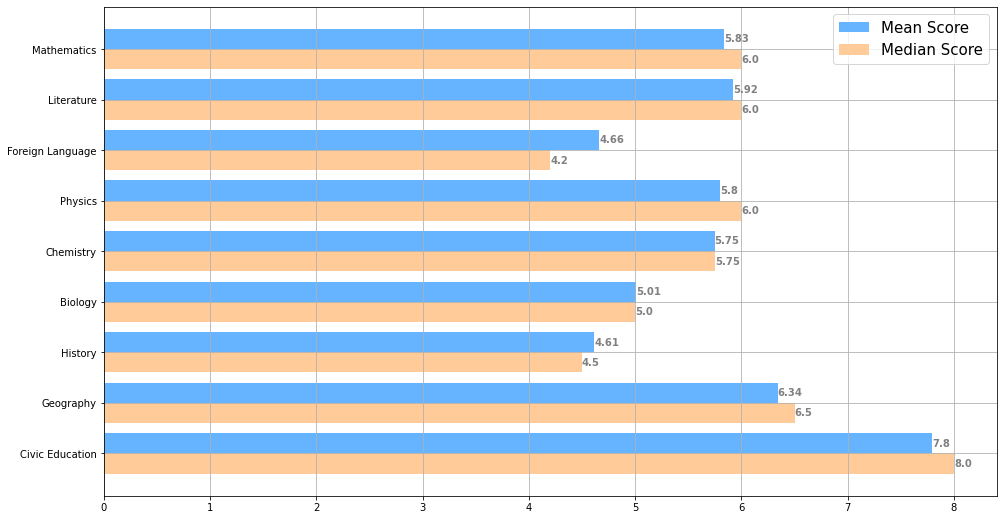

In [10]:
# Looking at various sample statistics for all subjects

# Making a bar chart for the mean and median score in NHGE 2017 - 2021 

fig, ax = plt.subplots(figsize =(16, 9))

# plotting multiple horizontal bars [9]

y_axis = np.arange(len(NHGE_1721_subjects.columns))
plt.barh(y_axis - 0.2, NHGE_1721_subjects.mean(), 0.4, label = "Mean Score", color = "#66b3ff")
plt.barh(y_axis + 0.2, NHGE_1721_subjects.median(), 0.4, label = "Median Score", color = "#ffcc99")

plt.legend(prop = {'size': 15})

# adding ticks to the y axis [9]
plt.yticks(y_axis, NHGE_1721_subjects.columns);

# add annotation to bars [10]
for i in ax.patches:
    plt.text(i.get_width(), i.get_y() + 0.255,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color = "grey")
plt.grid()

# inverting the y axis [10]
ax.invert_yaxis()

In [11]:
# making a list for the percentages of failing scores in the dataset
subject_fail = []
for i in NHGE_1721_subjects.columns:
    subject_fail.append(len(NHGE_1721[NHGE_1721_subjects[i] <= 1]) / len(NHGE_1721[NHGE_1721[i].isnull() == False]) * 100)
    
# making a list for the percentages of excel scores in the dataset
subject_excel = []
for i in NHGE_1721_subjects.columns:
    subject_excel.append(len(NHGE_1721[NHGE_1721_subjects[i] == 10]) / len(NHGE_1721[NHGE_1721[i].isnull() == False]) * 100)
    

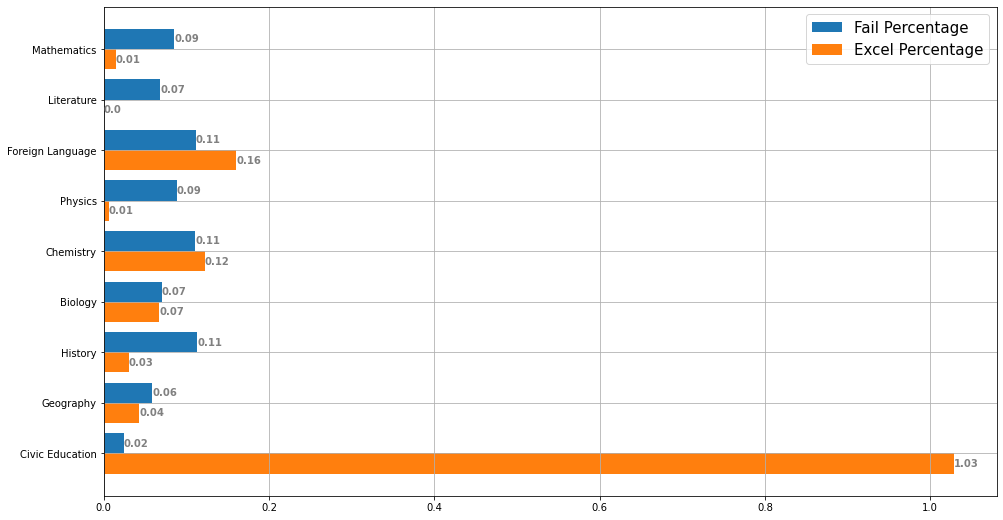

In [12]:
# Making a bar chart for the fail and excel percentages in NHGE 2017 - 2021 

fig, ax = plt.subplots(figsize =(16, 9))

# plotting multiple horizontal bars [9]

y_axis = np.arange(len(NHGE_1721_subjects.columns))
plt.barh(y_axis - 0.2, subject_fail, 0.4, label = "Fail Percentage")
plt.barh(y_axis + 0.2, subject_excel, 0.4, label = "Excel Percentage")

plt.legend(prop = {'size': 15})

# adding ticks to the y axis [9]
plt.yticks(y_axis, NHGE_1721_subjects.columns);

# add annotation to bars [10]
for i in ax.patches:
    plt.text(i.get_width(), i.get_y() + 0.255,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color = "grey")
plt.grid()

# inverting the y axis [10]
ax.invert_yaxis()

## Discussion and Conclusion

My data analysis suggests that nearly 90% of students take English in the NHGE, while all other languages offered (Japanese, Korean, Chinese, Russian, French, and German) are only taken by less than 0.35% of students. The remaining are missing values, which can mean either missing the exam or being qualified enough to skip it. As such, it is reasonable to consider Foreign Language a singular subject - English. After this point, Foreign Language and English will be used interchangeably.

There are two Specific Electives that a student can choose: Natural Science (Physics, Chemistry, Biology) and Social Science (History, Geography, Civics), couple that with the three mandatory subjects, and we have nine subjects that can be compared to one another. Based on the two above heatmaps, subjects from the same elective tend to be quite correlated. The most compatible subject is Maths, with an average correlation of nearly 0.5 in both maps, while the least is Biology, with an average correlation of 0.31 in 2017 - 2019, and 0.25 in 2020 - 2021. Chemistry and Physics both take the stand as the second least correlated subject, averaging less than 0.35 in both maps. For Social Science subjects, while their correlations in 2017 - 2019 to other subjects are not high, their correlations in 2020 - 2021 are, averaging at nearly 0.5 for all three.

Looking at various sample statistics for all subjects, the only subjects that have both mean and median scores below average (below 5) are English and History. Close by is Biology, with mean and median scores sitting right at the average. The highest mean and median scores belong to Civic Education, 7.8 and 8.0 respectively. From these analyses, it would seem that the hardest subject in the NHGE is Biology and the easiest is Civic Education.

Civic Education being the easiest subject in the NHGE seems to be validated by its fail and excel percentages, with only 0.02% that failed, and 1.03% scoring a perfect 10. Biology's title, however, wavers a bit. Its fail percentage is 0.07%, which is smaller than four other subjects', and its excel percentage is larger than five other subjects'. Subjects with high fail percentages and low excel percentages are Mathematics, Physics, and History. Literature is an exception because it's the only exam that isn't multiple choices, as such, it is almost impossible (as the score depends on the examiners) to get a perfect 10. Couple this with results from the heatmaps and the sample statistics, and it is reasonable to say that the hardest subject in the NHGE is either Physics or History. Physics because of its low average correlation scores, and History because of its very low mean - median scores.

If I were to experiment with this dataset again, I would investigate whether different provinces or regions consider different subjects more difficult than others. One subject analysis that really surprised me is Foreign Language, because for me, it is the easiest exam in the NHGE when I took it more than a year ago, and most of my peers would agree with this. It was the most forgiving time-wise, but most of what I've done in this project would place it as one of the harder subjects. As such, I believe there are big preference differences between provinces.

### References

1. Ume. (2022, October 8). Vietnam National HS Graduation Exam - 2020. Kaggle. Retrieved November 24, 2022, from https://www.kaggle.com/datasets/invictus169/vietnam-national-hs-graduation-exam-2020 

2. Ume. (2022, October 8). Vietnam National HS Graduation Exam - 2019. Kaggle. Retrieved November 24, 2022, from https://www.kaggle.com/datasets/invictus169/vietnam-national-hs-graduation-exam-2019 

3. Vương, P. Đỗ (2022, June 6). Vietnam highschool exam 2017 to 2021. Kaggle. Retrieved November 24, 2022, from https://www.kaggle.com/datasets/phuc16102001/vietnam-highschool-exam-2017-to-2021 

4. Ume. (2022, October 8). Vietnam National HS Graduation Exam - 2017. Kaggle. Retrieved November 24, 2022, from https://www.kaggle.com/datasets/invictus169/vietnam-national-hs-graduation-exam-2017 

5. Pandas: How to change all the values of a column? Stack Overflow. (1959, November 1). Retrieved November 24, 2022, from https://stackoverflow.com/questions/12604909/pandas-how-to-change-all-the-values-of-a-column 

6. Amipara, K. (2019, November 20). Better visualization of PIE charts by Matplotlib. Medium. Retrieved November 24, 2022, from https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f 

7. Carvalho, T. (2022, July 19). Heatmap basics with Python's Seaborn. Medium. Retrieved November 24, 2022, from https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c 

8. Format the output in Pandas. Stack Overflow. (1966, May 1). Retrieved November 24, 2022, from https://stackoverflow.com/questions/55414425/format-the-output-in-pandas 

9. Plotting multiple bar charts using Matplotlib in python. GeeksforGeeks. (2021, February 25). Retrieved November 24, 2022, from https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/ 

10. Bar plot in Matplotlib. GeeksforGeeks. (2021, March 4). Retrieved November 24, 2022, from https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ 